Loading the dataset of bank note:

In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

Importing the required libraries for Deep learning neural network and data preprocessing.

In [2]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/banknote_authentication.csv'
df = read_csv(path,header=None)

Loading the dataset from the gitub resources. The dataset is of Bank_Note.
Converting the dataset into data frame using pandas library.

In [3]:
df

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


Visaulizing the data frame.

In [4]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

Checking the null values in the dataset.
Since there are no null values the we are procedding with the data preprocessing part.

In [5]:
df[4].value_counts()

0    762
1    610
Name: 4, dtype: int64

Checking the number of categories in the target column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1372 non-null   float64
 1   1       1372 non-null   float64
 2   2       1372 non-null   float64
 3   3       1372 non-null   float64
 4   4       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


The above piece of code helps in getting the information of the dataset like column data types and name of the column and if there is null values in the dataset or not.

In [7]:
df.describe()

,0,1,2,3,4
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


The above code helps in getting the complete description of the dataset. It helps in understanding the distribution of the dataset.

In [8]:
import seaborn as sns

Import seaborn libraries for data visualization.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


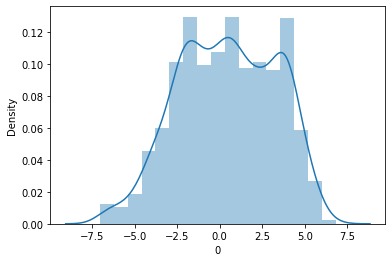

In [9]:
sns.distplot(df[0])

Checking the distribution of the first column.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


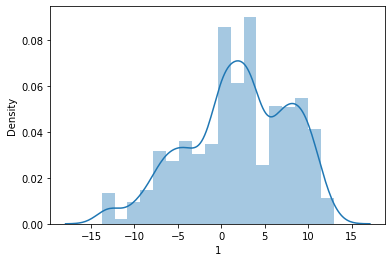

In [10]:
sns.distplot(df[1])

Checking the distribution of the second column.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


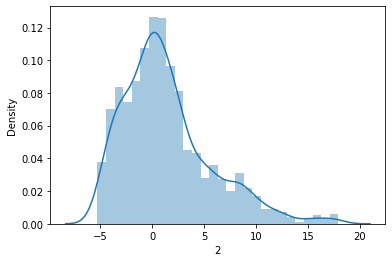

In [11]:
sns.distplot(df[2])

Checking the distribution of the third column.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


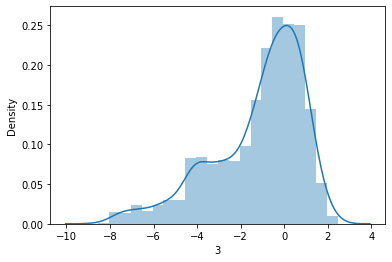

In [12]:
sns.distplot(df[3])

Checking the distribution of the fourth column.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


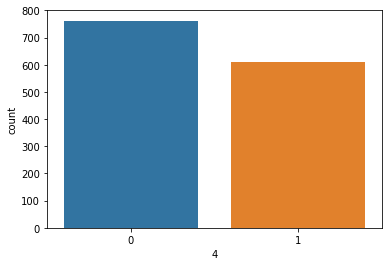

In [13]:
sns.countplot(df[4])

Checking the number of categories of the fifth column.

In [117]:
df[4].value_counts()

0    762
1    610
Name: 4, dtype: int64

In [15]:
df.skew()

0   -0.149388
1   -0.394103
2    1.088569
3   -1.022243
4    0.223191
dtype: float64

Cheking the skewness of the dataset column. Here, we will proceed with the range of -0.5 to +0.5 skewness.

In [16]:
from sklearn.preprocessing import power_transform

Importing libraries to remove the skewness.

In [17]:
x=df.iloc[:,:-1].values

Separating feature and target column.

In [18]:
x

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [19]:
y=df.iloc[:,-1].values

In [20]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [21]:
import pandas as pd

Converting target column into dataframe so that it will be concated later.

In [22]:
y=pd.DataFrame(y,columns=[4])

In [23]:
y

,4
0,0
1,0
2,0
3,0
4,0
...,...
1367,1
1368,1
1369,1
1370,1


In [24]:
x=power_transform(x,method="yeo-johnson")

Removing skewness from fatures column.

In [25]:
x

array([[ 1.13320374,  1.21271952, -1.13217899,  0.12483763],
       [ 1.47592726,  1.11253633, -0.99001798, -0.38190021],
       [ 1.22360846, -0.82552124,  0.33227324,  0.49342088],
       ...,
       [-1.44737283, -2.29008695,  2.70060973, -0.88382474],
       [-1.38548467, -1.6239021 ,  2.02428279, -0.30227217],
       [-1.04489549, -0.52729841,  0.48626864,  1.53319498]])

In [26]:
import pandas as pd
df_copy=pd.DataFrame(x)

Converting features column in dataset.

In [27]:
df_copy

,0,1,2,3
0,1.133204,1.212720,-1.132179,0.124838
1,1.475927,1.112536,-0.990018,-0.381900
2,1.223608,-0.825521,0.332273,0.493421
3,1.072264,1.385902,-1.650225,-1.146542
4,-0.062497,-1.085649,0.834721,-0.164250
...,...,...,...,...
1367,-0.035272,-0.190625,-0.602479,0.060325
1368,-0.656197,-1.144854,1.153661,0.683946
1369,-1.447373,-2.290087,2.700610,-0.883825
1370,-1.385485,-1.623902,2.024283,-0.302272


In [28]:
df_copy.skew()

0   -0.069875
1   -0.076854
2    0.054702
3    0.018215
dtype: float64

In [29]:
df_copy=pd.concat([df_copy,y],axis=1)

Merging features and target data frame.

In [30]:
df_copy

,0,1,2,3,4
0,1.133204,1.212720,-1.132179,0.124838,0
1,1.475927,1.112536,-0.990018,-0.381900,0
2,1.223608,-0.825521,0.332273,0.493421,0
3,1.072264,1.385902,-1.650225,-1.146542,0
4,-0.062497,-1.085649,0.834721,-0.164250,0
...,...,...,...,...,...
1367,-0.035272,-0.190625,-0.602479,0.060325,1
1368,-0.656197,-1.144854,1.153661,0.683946,1
1369,-1.447373,-2.290087,2.700610,-0.883825,1
1370,-1.385485,-1.623902,2.024283,-0.302272,1


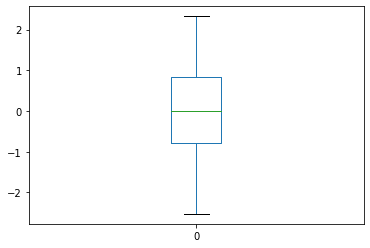

In [31]:
df_copy[0].plot.box()

checking outliers from the features column using box plot method. There is no outliers.

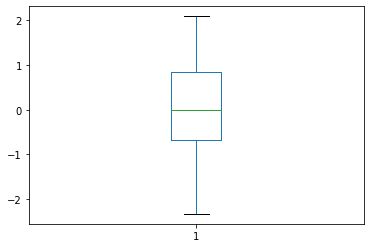

In [32]:
df_copy[1].plot.box()

checking outliers from the features column using box plot method. There is no outliers.

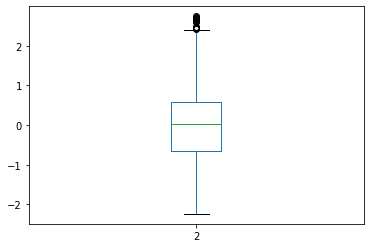

In [33]:
df_copy[2].plot.box()

checking outliers from the features column using box plot method. There is some outliers.

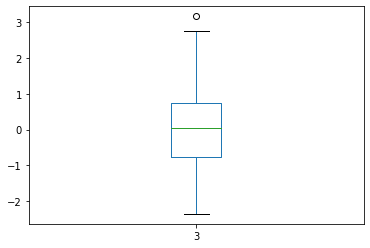

In [34]:
df_copy[3].plot.box()

checking outliers from the features column using box plot method. There is no outliers.

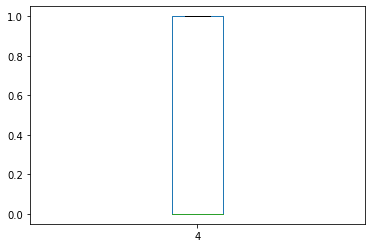

In [35]:
df_copy[4].plot.box()

In [36]:
df_copy.shape

(1372, 5)

In [37]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_copy))
threshold=3
np.where(z>3)

(array([413]), array([3]))

Using z-score method to check the position where outliers are present.

In [38]:
df_copy_new=df_copy[(z<3).all(axis=1)]
df_copy_new

,0,1,2,3,4
0,1.133204,1.212720,-1.132179,0.124838,0
1,1.475927,1.112536,-0.990018,-0.381900,0
2,1.223608,-0.825521,0.332273,0.493421,0
3,1.072264,1.385902,-1.650225,-1.146542,0
4,-0.062497,-1.085649,0.834721,-0.164250,0
...,...,...,...,...,...
1367,-0.035272,-0.190625,-0.602479,0.060325,1
1368,-0.656197,-1.144854,1.153661,0.683946,1
1369,-1.447373,-2.290087,2.700610,-0.883825,1
1370,-1.385485,-1.623902,2.024283,-0.302272,1


Removing outliers from the dataframe.

In [39]:
df_copy_new.shape

(1371, 5)

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Importing libraries to scale the data and separate it into training, testing and validating data.

In [100]:
X=df_copy_new.iloc[:,:-1].values
Y=df_copy_new.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

Splitting the data into training, testing and validation.

In [101]:
mms=MinMaxScaler()

In [102]:
x_train=mms.fit_transform(x_train)
x_test=mms.transform(x_test)
x_val=mms.transform(x_val)

Applying scaling technique on the data.

In [103]:
import warnings
warnings.filterwarnings('ignore')

It helps in removing the warning.

In [104]:
n_features=4
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1000, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_26 (Dense)             (None, 1000)              11000     
_________________________________________________________________
dense_27 (Dense)             (None, 100)               100100    
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 11        
Total params: 112,171
Trainable params: 112,171
Non-trainable params: 0
_________________________________________________________________


Creating a sequential layer for deep learning network. n_features is set to 4 because the total number of parameter in the feature column is 4. 
In the first layer i.e input layer we are adding 4 neurons and using relu activation function and kernel initializer as he_normal. 
In the first hidden layer we are adding 1000 neurons with relu activation function.
In the second hidden layer we are adding 100 neurons with relu activation function.
In the third hidden layer we are adding 10 neurons with relu activation function.
In the output layer we are using one neuron since its a binary classification problem. Sigmoid activation function works good in case of binary activation function as its range is [0,1].

In [105]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=["accuracy"])

During the compilation we are using ADAM optimizers as it has both variable learning rate and momentum. Here, loss will be binary cross entropy as it is a binary classification problem. The metrics used here is accuracy.

In [106]:
history = model.fit(x_train, y_train, epochs=17, batch_size=10,validation_split=0.2,verbose=2, validation_data=(x_val, y_val))

Epoch 1/17
70/70 - 1s - loss: 0.5766 - accuracy: 0.6729 - val_loss: 0.4559 - val_accuracy: 0.8011
Epoch 2/17
70/70 - 0s - loss: 0.3424 - accuracy: 0.8871 - val_loss: 0.2735 - val_accuracy: 0.8977
Epoch 3/17
70/70 - 0s - loss: 0.2229 - accuracy: 0.9086 - val_loss: 0.1785 - val_accuracy: 0.9489
Epoch 4/17
70/70 - 0s - loss: 0.1067 - accuracy: 0.9771 - val_loss: 0.1330 - val_accuracy: 0.9659
Epoch 5/17
70/70 - 0s - loss: 0.0654 - accuracy: 0.9886 - val_loss: 0.1581 - val_accuracy: 0.9545
Epoch 6/17
70/70 - 0s - loss: 0.0484 - accuracy: 0.9814 - val_loss: 0.0438 - val_accuracy: 0.9830
Epoch 7/17
70/70 - 0s - loss: 0.0303 - accuracy: 0.9943 - val_loss: 0.0675 - val_accuracy: 0.9659
Epoch 8/17
70/70 - 0s - loss: 0.0349 - accuracy: 0.9871 - val_loss: 0.0170 - val_accuracy: 1.0000
Epoch 9/17
70/70 - 0s - loss: 0.0166 - accuracy: 0.9986 - val_loss: 0.0145 - val_accuracy: 1.0000
Epoch 10/17
70/70 - 0s - loss: 0.0148 - accuracy: 0.9971 - val_loss: 0.0303 - val_accuracy: 0.9886
Epoch 11/17
70/70 -

Since we are getting maximum accuracy at epoch 17, and min loss so we are saving these parameters. Here batch size is 10 and verbose is 2 for better visualization of epoch.

In [107]:
yhat = model.predict_classes(x_test)

Predicting the classes of test data.

In [119]:
accuracy_score(y_test, yhat)

1.0

In [120]:
accuracy_score(y_train, model.predict_classes(x_train))

1.0

Checking the score of test and train data.

In [110]:
from sklearn.metrics import f1_score
f1_score(yhat,y_test)

1.0

Checking f1_score of train and test data.

In [111]:
f1_score(model.predict_classes(x_train),y_train)

1.0

checking the parameters of compilation model.

In [112]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [114]:
import matplotlib.pyplot as plt

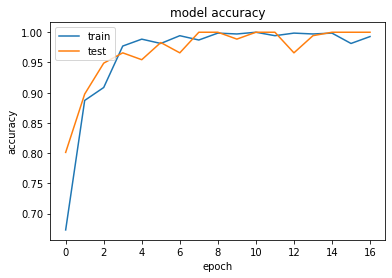

In [115]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Plotting accuracy vs epoch.

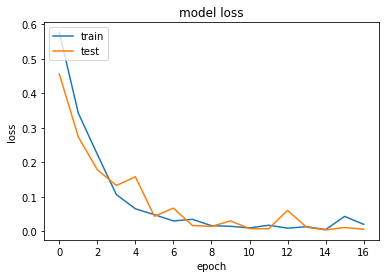

In [116]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Plotting epoch vs loss.